**Todo list**
1. Data overview
2. Data cleaning
-----------------
3. Create new data - date
4. Data visualization
5. Convert data
6. Create Good CV
7. Modeling

In [1]:
import pandas as pd
import json
import numpy as np

# convert json in df to columns
from pandas.io.json import json_normalize

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,8)

In [3]:
from sklearn import preprocessing

# Load data
Just load 100000 rows for the EDA's sake



In [16]:
%%time
nrows = 100000
json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']

json_conv = {col: json.loads for col in (json_cols)}

df_train = pd.read_csv("../data/train.csv", 
    dtype={'fullVisitorId': str},
    converters=json_conv,
    low_memory=False,
    parse_dates=['date'],
    nrows=nrows)

CPU times: user 3.38 s, sys: 1.1 s, total: 4.48 s
Wall time: 4.67 s


In [18]:
df_train['device'].iloc[0]

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [5]:
%%time

df_test = pd.read_csv('../data/test.csv',
    dtype={'fullVisitorId': str},
    converters=json_conv,
    low_memory=False,
    nrows=nrows)

CPU times: user 3.16 s, sys: 455 ms, total: 3.62 s
Wall time: 3.82 s


## Convert the json columns

In [6]:
# convert json columns into signle columns
def decode_json(df_raw,json_cols):
    df = df_raw.copy()
    for column in json_cols:
        tdf = json_normalize(df[column])
        df = df.drop(columns = [column])
        tdf.columns = [column + '_' + col for col in tdf.columns]
        df = df.merge(tdf, left_index=True, right_index=True)
    return df
        

In [7]:
%%time
df_train = decode_json(df_train,json_cols)


CPU times: user 11.4 s, sys: 399 ms, total: 11.8 s
Wall time: 12 s


In [8]:
%%time
df_test = decode_json(df_test,json_cols)

CPU times: user 10.6 s, sys: 305 ms, total: 10.9 s
Wall time: 10.9 s


In [9]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


# Data overview

In [10]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [11]:
df_train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserSize', 'device_browserVersion',
       'device_deviceCategory', 'device_flashVersion', 'device_isMobile',
       'device_language', 'device_mobileDeviceBranding',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_screenColors', 'device_screenResolution', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_latitude', 'geoNetwork_longitude', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_networkLocation',
       'geoNetwork_region', 'geoNetwork_subContinent', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_transactionRevenue

## totals_transactionRevenue

In [12]:
df_train.totals_transactionRevenue = df_train['totals_transactionRevenue'].fillna(0).astype(float)

In [13]:
df_train.totals_transactionRevenue = np.log1p(df_train['totals_transactionRevenue'])

create a new is_bought variables for the sake of visualization

In [14]:
df_train['is_bought'] = df_train['totals_transactionRevenue'] > 0

In [15]:
print('The data is highly unbalanced')
df_train.is_bought.value_counts()

The data is highly unbalanced


False    98601
True      1399
Name: is_bought, dtype: int64

# Data cleaning
This data contains json in some columns, we need to convert into indivitual columns

## Handle NA data

**Percetage of missing value in data**

But some of these Na isn't real Na. For example totals_transactionRevenue has default value for 0 is Na

In [21]:
print('Percetage of missing value in data')
(df_train.isnull().sum().sort_values(ascending=False)*100/len(df_train))[:15]

Percetage of missing value in data


trafficSource_campaignCode                      99.999
trafficSource_adContent                         98.675
trafficSource_adwordsClickInfo.adNetworkType    97.426
trafficSource_adwordsClickInfo.slot             97.426
trafficSource_adwordsClickInfo.page             97.426
trafficSource_adwordsClickInfo.isVideoAd        97.426
trafficSource_adwordsClickInfo.gclId            97.375
trafficSource_isTrueDirect                      69.546
trafficSource_referralPath                      63.527
trafficSource_keyword                           55.782
totals_bounces                                  51.084
totals_newVisits                                22.737
totals_pageviews                                 0.007
device_mobileDeviceInfo                          0.000
device_browserSize                               0.000
dtype: float64

### Replace NA string to NA

In [22]:
cols_to_replace = {
    'socialEngagementType' : 'Not Socially Engaged',
    'device_browserSize' : 'not available in demo dataset', 
    'device_flashVersion' : 'not available in demo dataset', 
    'device_browserVersion' : 'not available in demo dataset', 
    'device_language' : 'not available in demo dataset',
    'device_mobileDeviceBranding' : 'not available in demo dataset',
    'device_mobileDeviceInfo' : 'not available in demo dataset',
    'device_mobileDeviceMarketingName' : 'not available in demo dataset',
    'device_mobileDeviceModel' : 'not available in demo dataset',
    'device_mobileInputSelector' : 'not available in demo dataset',
    'device_operatingSystemVersion' : 'not available in demo dataset',
    'device_screenColors' : 'not available in demo dataset',
    'device_screenResolution' : 'not available in demo dataset',
    'geoNetwork_city' : 'not available in demo dataset',
    'geoNetwork_cityId' : 'not available in demo dataset',
    'geoNetwork_latitude' : 'not available in demo dataset',
    'geoNetwork_longitude' : 'not available in demo dataset',
    'geoNetwork_metro' : ['not available in demo dataset', '(not set)'], 
    'geoNetwork_networkDomain' : 'unknown.unknown', 
    'geoNetwork_networkLocation' : 'not available in demo dataset',
    'geoNetwork_region' : 'not available in demo dataset',
    'trafficSource_adwordsClickInfo.criteriaParameters' : 'not available in demo dataset',
    'trafficSource_campaign' : '(not set)', 
    'trafficSource_keyword' : '(not provided)'
}

In [23]:
%%time
df_train = df_train.replace(cols_to_replace, 'NA')

CPU times: user 9.37 s, sys: 315 ms, total: 9.69 s
Wall time: 9.74 s


In [24]:
%%time
df_test = df_test.replace(cols_to_replace, 'NA')

CPU times: user 10.8 s, sys: 373 ms, total: 11.1 s
Wall time: 11.1 s


### trafficSource_campaign

In [25]:
df_train['trafficSource_campaign'].value_counts()

NA                                                 95442
Data Share Promo                                    1901
AW - Dynamic Search Ads Whole Site                  1637
AW - Accessories                                     921
test-liyuhz                                           56
Retail (DO NOT EDIT owners nophakun and tianyu)       27
AW - Apparel                                           9
AW - Electronics                                       7
Name: trafficSource_campaign, dtype: int64

Just 1 campaign for the whole data set. It doesn't make any helps

Delete it

In [26]:
# df_train.drop('trafficSource_campaign',axis=1,inplace=True)
# df_test.drop('trafficSource_campaign',axis=1,inplace=True)
df_train.drop('trafficSource_campaignCode',axis=1,inplace=True)

### trafficSource_adContent 98.675 %

In [28]:
nan_bought_count = df_train[~df_train['trafficSource_adContent'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 18 people has non-nan value has bought


None of the revenue come from adsoruce, so we can delete it

In [29]:
del df_train['trafficSource_adContent']
del df_test['trafficSource_adContent']

### trafficSource_adwordsClickInfo.slot - 97.426

In [30]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.slot'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 60 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [31]:
del df_train['trafficSource_adwordsClickInfo.slot']
del df_test['trafficSource_adwordsClickInfo.slot']

### trafficSource_adwordsClickInfo.adNetworkType

In [32]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.adNetworkType'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 60 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [33]:
del df_train['trafficSource_adwordsClickInfo.adNetworkType']
del df_test['trafficSource_adwordsClickInfo.adNetworkType']

### trafficSource_adwordsClickInfo.page 

In [34]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.page'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 60 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [35]:
del df_train['trafficSource_adwordsClickInfo.page']
del df_test['trafficSource_adwordsClickInfo.page']

### trafficSource_adwordsClickInfo.isVideoAd

In [36]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.isVideoAd'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 60 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [37]:
del df_train['trafficSource_adwordsClickInfo.isVideoAd']
del df_test['trafficSource_adwordsClickInfo.isVideoAd']

### trafficSource_adwordsClickInfo.gclId

In [38]:
nan_bought_count = df_train[~df_train['trafficSource_adwordsClickInfo.gclId'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 61 people has non-nan value has bought


Too small of these contribute to the buy behavior 

Delete it

In [39]:
del df_train['trafficSource_adwordsClickInfo.gclId']
del df_test['trafficSource_adwordsClickInfo.gclId']

### trafficSource_isTrueDirect

In [40]:
df_train['trafficSource_isTrueDirect'].value_counts()

True    30454
Name: trafficSource_isTrueDirect, dtype: int64

In [41]:
df_train['trafficSource_isTrueDirect'].fillna(False,inplace=True)
df_test['trafficSource_isTrueDirect'].fillna(False,inplace=True)

### trafficSource_referralPath



In [42]:
nan_bought_count = df_train[~df_train['trafficSource_referralPath'].isnull()].is_bought.sum()
print(f"There are {nan_bought_count} people has non-nan value has bought")

There are 679 people has non-nan value has bought


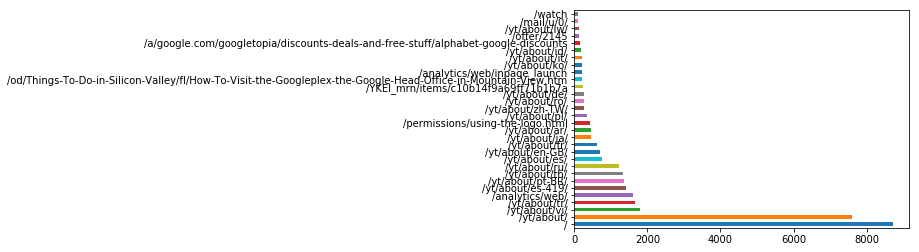

In [43]:
df_train['trafficSource_referralPath'].value_counts().sort_values(ascending=False)[:30].plot(kind='barh')

In [44]:
df_train['trafficSource_referralPath'].fillna('NA',inplace=True)
df_test['trafficSource_referralPath'].fillna('NA',inplace=True)

### trafficSource_keyword

In [45]:

df_train['trafficSource_keyword'].fillna('NA',inplace=True)
df_test['trafficSource_keyword'].fillna('NA',inplace=True)

### totals_bounces

In [46]:
df_train['totals_bounces'].fillna(0,inplace=True)
df_test['totals_bounces'].fillna(0,inplace=True)

### totals_newVisits

In [47]:
df_train['totals_newVisits'].fillna(0,inplace=True)
df_test['totals_newVisits'].fillna(0,inplace=True)

### totals_pageviews

In [48]:
df_train['totals_pageviews'].fillna(0,inplace=True)
df_test['totals_pageviews'].fillna(0,inplace=True)

## Remove constant columns

Create a new df with filled na to find the actual column with constant values

In [49]:
const_cols = []
for col in df_train.columns:
    if len(df_train[col].unique()) == 1:
        const_cols.append(col)
df_train.drop(const_cols,axis=1,inplace=True)
df_test.drop(const_cols,axis=1,inplace=True)
print(f'Dropped {len(const_cols)} constant columns')
    

Dropped 19 constant columns


In [50]:
df_train.isnull().sum()

channelGrouping               0
date                          0
fullVisitorId                 0
sessionId                     0
visitId                       0
visitNumber                   0
visitStartTime                0
device_browser                0
device_deviceCategory         0
device_isMobile               0
device_operatingSystem        0
geoNetwork_city               0
geoNetwork_continent          0
geoNetwork_country            0
geoNetwork_metro              0
geoNetwork_networkDomain      0
geoNetwork_region             0
geoNetwork_subContinent       0
totals_bounces                0
totals_hits                   0
totals_newVisits              0
totals_pageviews              0
totals_transactionRevenue     0
trafficSource_isTrueDirect    0
trafficSource_keyword         0
trafficSource_medium          0
trafficSource_referralPath    0
trafficSource_source          0
is_bought                     0
dtype: int64

## Convert date columns

In [53]:
fld_train = pd.to_datetime(df_train['date'], infer_datetime_format=True)
fld_test = pd.to_datetime(df_train['date'], infer_datetime_format=True)

In [54]:
attrs = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
        'Is_month_end', 'Is_month_start', 'Is_quarter_end', 
        'Is_quarter_start', 'Is_year_end', 'Is_year_start']

In [55]:
for attr in attrs:
    df_train['Date_'+attr] = getattr(fld_train.dt,attr.lower())
    df_test['Date_'+attr] = getattr(fld_test.dt,attr.lower())    
    

# Save data

In [72]:
len(df_train.columns),len(df_test.columns)

(40, 39)

In [59]:
df_train.to_csv('../data/train_.csv',index=False)
df_test.to_csv('../data/test_.csv',index=False)

## Encode data

In [76]:
df_train_backup = df_train.copy()
df_test_backup = df_test.copy()

In [96]:
df_all = pd.concat([df_train,df_test])

/Users/qnkhuat/miniconda2/envs/dev/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [ ]:
df['all']

In [97]:
for col in df_train.columns:
    if df_all[col].dtype == 'object':
        print(col)
        lb = preprocessing.LabelEncoder()
        df_all[col] = lb.fit_transform(df_all[col])
    

date


TypeError: Cannot compare type 'Timestamp' with type 'int'

In [93]:
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        print(col)
        y = list(df_train[col].unique()) + list(df_test[col].unique())
        lb = preprocessing.LabelEncoder()
        lb.fit(y)
        df_train[col] = lb.transform(df_train[col])
        df_test[col] = lb.transform(df_test[col])
    

totals_bounces


ValueError: y contains previously unseen labels: 0

In [94]:
df_train['Date_Day'].dtype == 'int64'

True

**Label encoding data**